In [0]:
import requests
import csv
import time
from multiprocessing import Pool
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from functools import partial

In [0]:
url = "https://api.bilibili.com/x/relation/followings?vmid="
theurl = url + str(3421488)
web = requests.get(theurl, timeout=3).json()['data']
web['total']

173

In [0]:
type(web['list'][0]['mid'])

int

In [0]:
len([i['mid'] for i in web['list']])

50

In [0]:
def get_sample(start, stop, step, sub_sample_size):
    idlists = list()
    for i in range(start, stop, step):
        ilist = random.sample(list(range(i, step + i)), sub_sample_size)
        ilist.sort()
        idlists.append(ilist)
    return idlists

In [0]:
random.seed(2018)
idlists = get_sample(start=1, stop=386800000, step=1000000, sub_sample_size=1400)

In [0]:
def simple_crawler(e_idl):
    f_list = []
    e, idl = e_idl
    print("Process %d Starts!" % e)
    url = "https://api.bilibili.com/x/relation/followings?vmid="
    for ii in idl:
        theurl = url + str(ii)
        follow = 0
        try:
            web = requests.get(theurl, timeout=3).json()['data']
            follow = web['total']
            assert follow >= 5
        except:
            continue
        else:
            row = []
            row.append(ii)
            row.extend([i['mid'] for i in web['list']])
            row.extend([-1 for i in range(50 - follow)])
            f_list.append(tuple(row))
    the_path = "result_%d.csv" % e
    time.sleep(int(random.random()*5))
    with open(the_path, 'w', encoding='utf-8-sig', newline='') as out:
        csv_out = csv.writer(out)
        csv_out.writerows(f_list)
    print("Process %d Finished!" % e)

In [0]:
# for test only
random.seed(2018)
in_list = random.sample(list(range(387)), 20)
ridlists = [idlists[i] for i in in_list]

In [0]:
simple_crawler((0, [1,2,3,4,5]))

Process 0 Starts!
1
5
Process 0 Finished!


In [0]:
pool = Pool(len(idlists))
print("start!")
start = time.time()
pool.map(simple_crawler, enumerate(idlists))
end = time.time()
print("All Finished!")
print("run time: %.2fs" % (end - start))

Process 0 Starts!
Process 2 Starts!
Process 1 Starts!
Process 4 Starts!
Process 5 Starts!
Process 11 Starts!
Process 10 Starts!
Process 12 Starts!
Process 9 Starts!
Process 3 Starts!
Process 7 Starts!
Process 6 Starts!
Process 19 Starts!
Process 13 Starts!
Process 18 Starts!
Process 16 Starts!
Process 15 Starts!
Process 17 Starts!
Process 8 Starts!
Process 14 Starts!
start!
Process 21 Starts!
Process 20 Starts!
Process 22 Starts!
Process 23 Starts!
Process 24 Starts!
Process 25 Starts!
Process 26 Starts!
Process 29 Starts!
Process 27 Starts!
Process 28 Starts!
Process 32 Starts!
Process 33 Starts!
Process 35 Starts!
Process 30 Starts!
Process 34 Starts!
Process 31 Starts!
Process 36 Starts!
Process 41 Starts!
Process 40 Starts!
Process 37 Starts!
Process 38 Starts!
Process 43 Starts!
Process 42 Starts!
Process 39 Starts!
Process 45 Starts!
Process 44 Starts!
Process 46 Starts!
Process 51 Starts!
Process 48 Starts!
Process 47 Starts!
Process 49 Starts!
Process 52 Starts!
Process 50 Star

In [0]:
os.listdir()[-1]

'result_274.csv'

In [0]:
datalist = list()
columns = ['userid']
columns.extend(['upid_'+str(i) for i in range(50)])
for i in os.listdir()[2:]:
    try:
        newdata = pd.read_csv(i, sep=",", header=None, names= columns)
        datalist.append(newdata)
    except pd.errors.EmptyDataError:
        continue
data = pd.concat(datalist, axis=0)

In [0]:
data.sort_values(by=['userid'], inplace=True)

In [0]:
data.to_csv("final_result.csv", index = False)

In [0]:
data = pd.read_csv("final_result.csv", header = 0)

In [0]:
data.head()

In [0]:
# for delete files only!!!
for i in os.listdir()[2:]:
  os.remove(i)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,2,34492771,3465630,141309272,1328260,93582,18,19357605,1678535,2853209,...,174501086,120187282,10266242,9024436,235555226,3876,9617619,20165629,10923790,8047632
1,3,35579222,466272,16307541,72496892,6997378,110352985,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,4,585267,122879,730732,6486094,7369403,168598,374377,777536,5055,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [0]:
total_results = []
for i in results:
  total_results.extend(i)
total_results = np.array(total_results)
print(np.mean(total_results))

6.0285


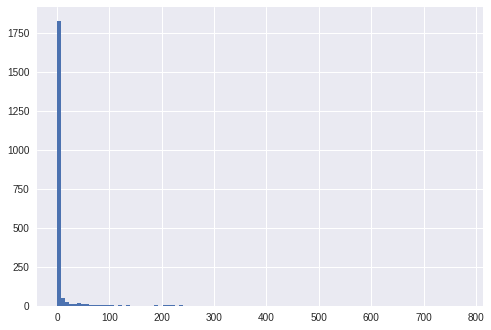

In [0]:
plt.hist(total_results,bins=100)
plt.show()

In [0]:
np.median(total_results)
np.nonzero(total_results)[0].shape[0]/total_results.shape[0]

0.2045

In [0]:
tdata = pd.DataFrame({"result":total_results})

In [0]:
tdata.columns

Index(['result'], dtype='object')

In [0]:
tdata.query('result>=5').shape[0]/total_results.shape[0]

0.1085

In [0]:
np.min(total_results)

0

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('final_result.csv',header=0)

In [0]:
data.shape

(43741, 51)

In [0]:
data = data.iloc[:,1:]

In [0]:
import numpy as np

In [0]:
uni = np.unique(data,return_counts=True,)

In [0]:
up_data = pd.DataFrame({'uid': uni[0][1:], 'count': uni[1][1:]})

In [0]:
print(len(uni[0]))

168649


In [0]:
up_for_crawler = up_data['uid'][up_data['count']>=5]

In [0]:
np.array(up_for_crawler)[0:10]

array([  1,   2,  16,  75,  79, 109, 159, 395, 608, 899])

In [0]:
ip_df = pd.read_csv("ip.csv", header=None)

In [0]:
ip_df.shape

(100, 2)

In [0]:
the_s_url = "https://space.bilibili.com/ajax/member/getSubmitVideos?mid=1"

In [0]:
domain="http://"+str(ip_df[0][0])+":"+str(ip_df[1][0])

In [0]:
for i in range(100):
  start = time.time()
  domain="http://"+str(ip_df[0][i])+":"+str(ip_df[1][i])
  try:
    s_web = requests.get(the_s_url, timeout=3, proxies = proxies)
  except:
    print("The %d ip does not work" %i)
  runtime = time.time() - start
  print("The %d ip, time is %f" %(i, runtime))
  print(s_web)

The 0 ip, time is 2.207574
<Response [200]>
The 1 ip, time is 2.326145
<Response [200]>
The 2 ip, time is 3.410644
<Response [200]>
The 3 ip, time is 1.486442
<Response [200]>
The 4 ip, time is 1.565101
<Response [200]>
The 5 ip, time is 1.492417
<Response [200]>
The 6 ip, time is 1.505045
<Response [200]>
The 7 ip, time is 1.513025
<Response [200]>
The 8 ip, time is 1.874686
<Response [200]>
The 9 ip, time is 2.845097
<Response [200]>
The 10 ip, time is 3.156209
<Response [200]>
The 11 ip, time is 2.940456
<Response [200]>
The 12 ip, time is 2.876821
<Response [200]>
The 13 ip does not work
The 13 ip, time is 0.130212
<Response [200]>
The 14 ip does not work
The 14 ip, time is 3.007062
<Response [200]>
The 15 ip, time is 3.632484
<Response [200]>
The 16 ip does not work
The 16 ip, time is 2.263600
<Response [200]>
The 17 ip, time is 1.687075
<Response [200]>
The 18 ip, time is 1.745218
<Response [200]>
The 19 ip, time is 1.926618
<Response [200]>


Process ForkPoolWorker-178:
Process ForkPoolWorker-189:
Process ForkPoolWorker-186:
Process ForkPoolWorker-180:
Process ForkPoolWorker-183:
Process ForkPoolWorker-167:
Process ForkPoolWorker-166:
Process ForkPoolWorker-163:
Process ForkPoolWorker-162:
Process ForkPoolWorker-171:
Process ForkPoolWorker-188:
Process ForkPoolWorker-159:
Process ForkPoolWorker-192:
Process ForkPoolWorker-185:
Process ForkPoolWorker-177:
Process ForkPoolWorker-179:
Process ForkPoolWorker-190:
Process ForkPoolWorker-182:
Process ForkPoolWorker-181:
Process ForkPoolWorker-173:
Process ForkPoolWorker-176:
Process ForkPoolWorker-187:
Process ForkPoolWorker-200:
Process ForkPoolWorker-196:
Process ForkPoolWorker-195:
Process ForkPoolWorker-201:
Traceback (most recent call last):
Process ForkPoolWorker-199:
Process ForkPoolWorker-160:
Process ForkPoolWorker-164:
Process ForkPoolWorker-191:
Process ForkPoolWorker-198:
Traceback (most recent call last):
Process ForkPoolWorker-174:
Process ForkPoolWorker-170:
Proces

The 20 ip does not work
The 20 ip, time is 0.719409
<Response [200]>


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multipro

The 21 ip, time is 3.346555
<Response [200]>
The 22 ip, time is 3.521783
<Response [200]>
The 23 ip, time is 3.581941
<Response [200]>
The 24 ip, time is 2.099213
<Response [200]>
The 25 ip, time is 3.083212
<Response [200]>
The 26 ip does not work
The 26 ip, time is 3.006387
<Response [200]>
The 27 ip, time is 3.996566
<Response [200]>
The 28 ip, time is 2.100401
<Response [200]>
The 29 ip, time is 2.027925
<Response [200]>
The 30 ip, time is 2.535302
<Response [200]>
The 31 ip, time is 3.303409
<Response [200]>
The 32 ip, time is 2.201616
<Response [200]>
The 33 ip, time is 1.767816
<Response [200]>
The 34 ip, time is 2.207743
<Response [200]>
The 35 ip, time is 2.379580
<Response [200]>
The 36 ip, time is 2.597844
<Response [200]>
The 37 ip, time is 2.291965
<Response [200]>
The 38 ip, time is 2.240399
<Response [200]>
The 39 ip, time is 1.928276
<Response [200]>
The 40 ip, time is 1.482689
<Response [200]>
The 41 ip, time is 1.447908
<Response [200]>
The 42 ip, time is 2.530675
<Re

In [0]:
domain

'http://91.202.240.208:51678'

In [0]:
proxies={ "http": domain, "https": domain} 

In [0]:
s_web = requests.get(the_s_url, timeout=3, proxies = proxies).json()['data']

In [0]:
s_web

{'count': 2,
 'pages': 1,
 'tlist': {'3': {'count': 1, 'name': '音乐', 'tid': 3},
  '4': {'count': 1, 'name': '游戏', 'tid': 4}},
 'vlist': [{'aid': 55,
   'author': 'bishi',
   'comment': 7495,
   'copyright': '',
   'created': 1247496094,
   'description': '没有听过这首歌的话会是人参的一大遗憾呢..(望天',
   'favorites': 1401,
   'hide_click': False,
   'is_pay': 0,
   'length': '01:38',
   'mid': 1,
   'pic': '//i1.hdslb.com/bfs/archive/c392288c19bbdf3762919774bce01c76dc346344.jpg',
   'play': 194165,
   'review': 0,
   'subtitle': '',
   'title': '【天哥版】最春哥',
   'typeid': 31,
   'video_review': 996},
  {'aid': 16,
   'author': 'bishi',
   'comment': 4569,
   'copyright': '',
   'created': 1247073333,
   'description': 'CRUCIS FATAL FAKE : Fate Stay Night的同人格斗游戏. MV制作 : yaomenghua 天下格斗之同人堂BBS : http://www.vsgame.com.cn/bbs/index.php',
   'favorites': 2501,
   'hide_click': False,
   'is_pay': 0,
   'length': '09:43',
   'mid': 1,
   'pic': '//i0.hdslb.com/bfs/archive/ef521697c031bd2b0aab5c8aab3abe1ea0ca63b9.j

In [0]:
s_web['vlist'][0]['created']

1486699200

In [0]:
s_web['tlist']['1']['count']

2

In [0]:
s_web['tlist'].__contains__('2')

False

In [0]:
def up_crawler(e_idl, ip_df = ip_df):
    data = []
    missing = []
    tlist = ['1','11','119','12','129','13','155','160','165','167','177','181','23','3','36','4','5']
    e, idl = e_idl
    print("Process %d Starts!" % e)
    f_url = "https://api.bilibili.com/x/relation/followers?vmid="
    s_url = "https://space.bilibili.com/ajax/member/getSubmitVideos?mid="
    for ii in idl:
      the_f_url = f_url + str(ii)
      the_s_url = s_url + str(ii)
      row = []
      row.append(ii)
      ranip = random.randint(0, ip_df.shape[0]-1)
      domain="http://"+str(ip_df[0][ranip])+":"+str(ip_df[1][ranip])
      proxies={"http": domain, "https": domain}
      error = False
      try:
        f_web = requests.get(the_f_url, timeout=3, proxies = proxies).json()['data']
        s_web = requests.get(the_s_url, timeout=3, proxies = proxies).json()['data']
      except:
        print("First try failed with up主 %d" % ii)
        ranip = random.randint(0, ip_df.shape[0]-1)
        domain="http://"+str(ip_df[0][ranip])+":"+str(ip_df[1][ranip])
        proxies={"http": domain, "https": domain}
        try:
          f_web = requests.get(the_f_url, timeout=4, proxies = proxies).json()['data']
          s_web = requests.get(the_s_url, timeout=4, proxies = proxies).json()['data']
        except:
          print("Second try failed with up主 %d" % ii)
          ranip = random.randint(0, ip_df.shape[0]-1)
          domain="http://"+str(ip_df[0][ranip])+":"+str(ip_df[1][ranip])
          proxies={"http": domain, "https": domain}
          try:
            f_web = requests.get(the_f_url, timeout=5, proxies = proxies).json()['data']
            s_web = requests.get(the_s_url, timeout=5, proxies = proxies).json()['data']
          except:
            print("Third try failed with up主 %d" % ii)
            try:
              f_web = requests.get(the_f_url, timeout=6).json()['data']
              s_web = requests.get(the_s_url, timeout=6).json()['data']
            except:
                print("something is wrong with up主 %d" % ii)
                missing.append(ii)
                error = True
      finally:
        if not error:
          # count of follower
          row.append(f_web['total'])
          # count of videos uploaded
          row.append(s_web['count'])
          if s_web['count'] == 0:
              row.extend([0 for i in range(len(tlist))])
              data.append(tuple(row))
          else:
            for tid in tlist:
                if s_web['tlist'].__contains__(tid):
                    row.append(s_web['tlist'][tid]['count'])
                else:
                    row.append(0)
            data.append(tuple(row))
    the_path = "up_result_%d.csv" % e
    time.sleep(int(random.random()*5))
    with open(the_path, 'w', encoding='utf-8-sig', newline='') as out:
        csv_out = csv.writer(out)
        csv_out.writerows(data)
    print("Process %d Finished!" % e)
    return missing

In [0]:
start = time.time()
miss_ups = up_crawler((0, np.array(up_for_crawler)[0:10]), ip_df)
print("Total time %f"%(time.time() - start))

Process 0 Starts!
First try failed with up主 1
First try failed with up主 2
Second try failed with up主 2
First try failed with up主 16
First try failed with up主 159
Second try failed with up主 159
Third try failed with up主 159
First try failed with up主 395
Second try failed with up主 395
First try failed with up主 899
Second try failed with up主 899
Process 0 Finished!
Total time 44.909863


In [0]:
len(miss_ups)

0

In [0]:
up_for_crawler[27600:27876].shape

(33,)

In [75]:
miss_list

NameError: ignored

In [0]:
up_lists = [up_for_crawler[i*276:(i+1)*276].values for i in range(101)]

In [0]:
pool = Pool(len(up_lists))
print("start!")
start = time.time()
missing_up = pool.map(partial(up_crawler, ip_df = ip_df), enumerate(up_lists))
end = time.time()
print("All Finished!")
print("run time: %.2fs" % (end - start))

Process 0 Starts!
Process 2 Starts!
Process 22 Starts!
Process 16 Starts!
Process 13 Starts!
Process 25 Starts!
Process 15 Starts!
Process 24 Starts!
Process 21 Starts!
Process 18 Starts!
Process 20 Starts!
Process 12 Starts!
Process 19 Starts!
Process 17 Starts!
Process 23 Starts!
Process 9 Starts!
Process 14 Starts!
Process 1 Starts!
Process 3 Starts!
Process 31 Starts!
Process 6 Starts!
start!
Process 30 Starts!
Process 4 Starts!
Process 10 Starts!
Process 8 Starts!
Process 5 Starts!
Process 7 Starts!
Process 11 Starts!
Process 29 Starts!
Process 34 Starts!
Process 33 Starts!
Process 32 Starts!
Process 37 Starts!
Process 26 Starts!
Process 35 Starts!
Process 38 Starts!
Process 27 Starts!
Process 36 Starts!
Process 28 Starts!
Process 39 Starts!
Process 41 Starts!
Process 40 Starts!
Process 44 Starts!
First try failed with up主 2625687
Process 46 Starts!
Process 45 Starts!
Process 42 Starts!
Process 43 Starts!
Process 47 Starts!
Process 48 Starts!
Process 50 Starts!
Process 52 Starts!


In [0]:
up_info = pd.read_csv("up_result_0.csv", header=None)

In [0]:
missing_list = []
for i in range(len(missing_up)):
  missing_list.extend(missing_up[i])

In [58]:
len(missing_list)

177

In [0]:
new_up_lists = [missing_list[i*17:(i+1)*17] for i in range(11)]

In [66]:
len(new_up_lists[10])

7

In [0]:
def miss_up_crawler(e_idl, ip_df = ip_df):
    data = []
    missing = []
    tlist = ['1','11','119','12','129','13','155','160','165','167','177','181','23','3','36','4','5']
    e, idl = e_idl
    print("Process %d Starts!" % e)
    f_url = "https://api.bilibili.com/x/relation/followers?vmid="
    s_url = "https://space.bilibili.com/ajax/member/getSubmitVideos?mid="
    for ii in idl:
      the_f_url = f_url + str(ii)
      the_s_url = s_url + str(ii)
      row = []
      row.append(ii)
      ranip = random.randint(0, ip_df.shape[0]-1)
      domain="http://"+str(ip_df[0][ranip])+":"+str(ip_df[1][ranip])
      proxies={"http": domain, "https": domain}
      error = False
      try:
        f_web = requests.get(the_f_url, timeout=3, proxies = proxies).json()['data']
        s_web = requests.get(the_s_url, timeout=3, proxies = proxies).json()['data']
      except:
        print("First try failed with up主 %d" % ii)
        ranip = random.randint(0, ip_df.shape[0]-1)
        domain="http://"+str(ip_df[0][ranip])+":"+str(ip_df[1][ranip])
        proxies={"http": domain, "https": domain}
        try:
          f_web = requests.get(the_f_url, timeout=4, proxies = proxies).json()['data']
          s_web = requests.get(the_s_url, timeout=4, proxies = proxies).json()['data']
        except:
          print("Second try failed with up主 %d" % ii)
          ranip = random.randint(0, ip_df.shape[0]-1)
          domain="http://"+str(ip_df[0][ranip])+":"+str(ip_df[1][ranip])
          proxies={"http": domain, "https": domain}
          try:
            f_web = requests.get(the_f_url, timeout=5, proxies = proxies).json()['data']
            s_web = requests.get(the_s_url, timeout=5, proxies = proxies).json()['data']
          except:
            print("Third try failed with up主 %d" % ii)
            try:
              f_web = requests.get(the_f_url, timeout=6).json()['data']
              s_web = requests.get(the_s_url, timeout=6).json()['data']
            except:
                print("something is wrong with up主 %d" % ii)
                missing.append(ii)
                error = True
      finally:
        if not error:
          # count of follower
          row.append(f_web['total'])
          # count of videos uploaded
          row.append(s_web['count'])
          if s_web['count'] == 0:
              row.extend([0 for i in range(len(tlist))])
              data.append(tuple(row))
          else:
            for tid in tlist:
                if s_web['tlist'].__contains__(tid):
                    row.append(s_web['tlist'][tid]['count'])
                else:
                    row.append(0)
            data.append(tuple(row))
    the_path = "miss_up_result_%d.csv" % e
    time.sleep(int(random.random()*5))
    with open(the_path, 'w', encoding='utf-8-sig', newline='') as out:
        csv_out = csv.writer(out)
        csv_out.writerows(data)
    print("Process %d Finished!" % e)
    return missing

In [0]:
{"1":158,"11":0,"119":8,"12":0,"129":50,"13":13,"155":87,"160":1428,"165":10,"167":12,"177":4,"181":611,"23":0,"3":385,"36":264,"4":1815,"5":513}

In [80]:
pool = Pool(len(new_up_lists))
print("start!")
start = time.time()
missing_up = pool.map(partial(miss_up_crawler, ip_df = ip_df), enumerate(new_up_lists))
end = time.time()
print("All Finished!")
print("run time: %.2fs" % (end - start))

Process 1 Starts!
Process 0 Starts!
Process 4 Starts!
Process 3 Starts!
Process 6 Starts!
Process 8 Starts!
Process 2 Starts!
Process 7 Starts!
Process 10 Starts!
Process 9 Starts!
Process 5 Starts!
First try failed with up主 2417165
First try failed with up主 39347488
First try failed with up主 31044782
start!
First try failed with up主 201575745
First try failed with up主 19489570
First try failed with up主 92932756
Second try failed with up主 92932756
First try failed with up主 21666
First try failed with up主 891124
Second try failed with up主 891124
Third try failed with up主 891124
Second try failed with up主 19489570
First try failed with up主 7067229
Second try failed with up主 201575745
First try failed with up主 12373548
First try failed with up主 2440627
First try failed with up主 93387180
First try failed with up主 40671543
First try failed with up主 1319849
Second try failed with up主 1319849
First try failed with up主 95533135
Second try failed with up主 95533135
First try failed with up主 1365

In [81]:
missing_up

[[253752], [], [], [], [], [18913956], [], [], [], [], []]

In [0]:
last_miss = []
for i in range(len(missing_up)):
  last_miss.extend(missing_up[i])

In [85]:
miss_ups = miss_up_crawler((99, last_miss), ip_df)

Process 99 Starts!
First try failed with up主 18913956
Second try failed with up主 18913956
Third try failed with up主 18913956
something is wrong with up主 18913956
Process 99 Finished!


18913956粉丝列表状态不对

In [86]:
os.listdir()

['.config',
 'up_result_77.csv',
 'up_result_13.csv',
 'up_result_64.csv',
 'up_result_6.csv',
 'up_result_5.csv',
 'up_result_45.csv',
 'up_result_67.csv',
 'up_result_49.csv',
 'up_result_54.csv',
 'up_result_91.csv',
 'up_result_7.csv',
 'up_result_17.csv',
 'up_result_86.csv',
 'up_result_3.csv',
 'up_result_69.csv',
 'up_result_28.csv',
 'up_result_97.csv',
 'miss_up_result_9.csv',
 'up_result_65.csv',
 'up_result_46.csv',
 'up_result_74.csv',
 'up_result_43.csv',
 'miss_up_result_8.csv',
 'up_result_21.csv',
 'up_result_78.csv',
 'up_result_24.csv',
 'up_result_10.csv',
 'up_result_35.csv',
 'up_result_22.csv',
 'up_result_84.csv',
 'up_result_33.csv',
 'up_result_23.csv',
 'up_result_93.csv',
 'up_result_55.csv',
 'up_result_15.csv',
 'up_result_42.csv',
 'up_result_98.csv',
 'up_result_66.csv',
 'up_result_82.csv',
 'up_result_30.csv',
 'miss_up_result_2.csv',
 'up_result_95.csv',
 'up_result_87.csv',
 'up_result_11.csv',
 'up_result_41.csv',
 'up_result_20.csv',
 'up_result_51

In [0]:
file_list = os.listdir()
for i in ['ip.csv','sample_data','final_result.csv','.config']:
  file_list.remove(i)

In [0]:
datalist = list()
columns = ['upid','follower','count','1','11','119','12','129','13','155','160','165','167','177','181','23','3','36','4','5']
for i in file_list:
    try:
        newdata = pd.read_csv(i, sep=",", header=None, names= columns)
        datalist.append(newdata)
    except pd.errors.EmptyDataError:
        continue
up_data = pd.concat(datalist, axis=0)

In [94]:
up_data.shape

(27632, 20)

In [0]:
up_data.to_csv("up_data.csv", index=False)